In [14]:
from methods import *
import nibabel as nib
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 as cv
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = "gray"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["axes.grid"] = "False"
plt.rcParams["savefig.transparent"] = "True"

In [15]:
coils_path = (Path.cwd() / 'data' / 'Slice44-AllChannels.nii')

In [16]:
nib_obj = nib.load(coils_path)
img_np = np.array(nib_obj.dataobj)
img_np  = np.flip( img_np, [0,1])


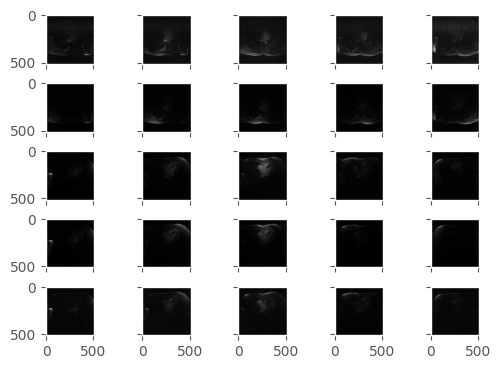

In [17]:
ncoils = img_np.shape[-1]
axis = int(np.sqrt(ncoils))
fig, axs = plt.subplots(
    axis, axis,
    squeeze=False, sharex='all', 
    sharey='all')

coil = 0
for i in range(axis):
    for j in range(axis):
        axs[i,j].imshow(img_np[:,:,coil])
        coil+=1

#plt.tight_layout()
plt.subplots_adjust(
    left=0.125,
    right=0.9,
    top=0.9,
    bottom=0.1,
    wspace=0.2,
    hspace=0.4
)
plt.show()

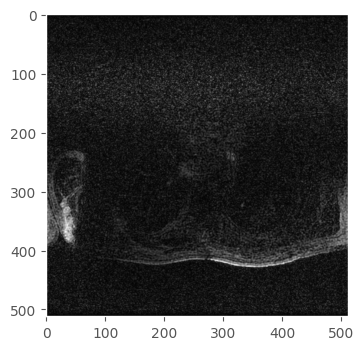

In [26]:
plt.imshow(img_np[:,:,4])
plt.show()

In [27]:
output_img = cv.normalize(
    img_np[:, :, 4], None,
    0, 255, cv.NORM_MINMAX
)
cv.imwrite("coil1.png", output_img)

True